"By Saeed Bidi, May2023"

In [1]:
# Importing the libraries
import numpy as np # for array operations
from numpy import mean
from numpy import std
from numpy import absolute

import pandas as pd # for working with DataFrames
import requests, io # for HTTP requests and I/O commands
import matplotlib.pyplot as plt # for data visualization
import matplotlib.pylab as pylab
import os

from matplotlib import pyplot
import seaborn as sns
# from google.colab import files
# %matplotlib inline
from yellowbrick.regressor import prediction_error
from yellowbrick.regressor import PredictionError

# scikit-learn modules
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn import metrics
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor # for building the model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

In [39]:
# dataset = pd.read_csv('Data/Temperature_Data.csv')
# #dataset = dataset[dataset['DNI (W/m2)'] >= 1]
# X = dataset.iloc[:, 2:-2].values   # Maybe outlet temperature should also be added???
# y = dataset.iloc[:, -2].values
# #y = y.reshape(len(y),1)

# -------------------


dataset = pd.read_csv('Data/Temperature_Data.csv')
#dataset = dataset[dataset['DNI (W/m2)'] >= 1]

# dataset = dataset.drop(columns='Av. Surface temp (heated zone) (C) ')
# directory = 'Output_September_Outlet_Temp/'
# Vaxis = 'Outlet temperature (C)'

dataset = dataset.drop(columns='Outlet Temp. (C) ')
directory = 'Output_September_Surface temp/'
Vaxis = 'Surface temperature (C)'



X = dataset.iloc[:, 2:-1].values   
y = dataset.iloc[:, -1].values
#y = y.reshape(len(y),1)

dataset = dataset.rename(columns={'DNI (W/m2)':'Solar radiation (W/m2)'})

# regressor = XGBRegressor()
# regressor_name = "XGB Decision Tree"

regressor = RandomForestRegressor()
regressor_name = str(regressor)[:-2]

# regressor = LinearRegression()
# regressor_name = "LinearRegression"

# regressor = SVR(kernel = 'linear')
# regressor_name = "SVR"

# regressor = KNeighborsRegressor(n_neighbors=3)
# regressor_name = "KNeighborsRegressor"


Index(['#', 'Time', 'DNI (W/m2)', 'Air Temp. (C)', 'Humidity (%)',
       'Wind Speed (m/s)', 'Inlet Temp. (C)', 'SystemOn/Off',
       'Av. Surface temp (heated zone) (C) ', 'Outlet Temp. (C) '],
      dtype='object')

/var/folders/k8/72lnznpx12l10nmmgpjnc8800000gn/T/ipykernel_84191/3999629877.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  rounded_corr_matrix = dataset1.corr().round(2)


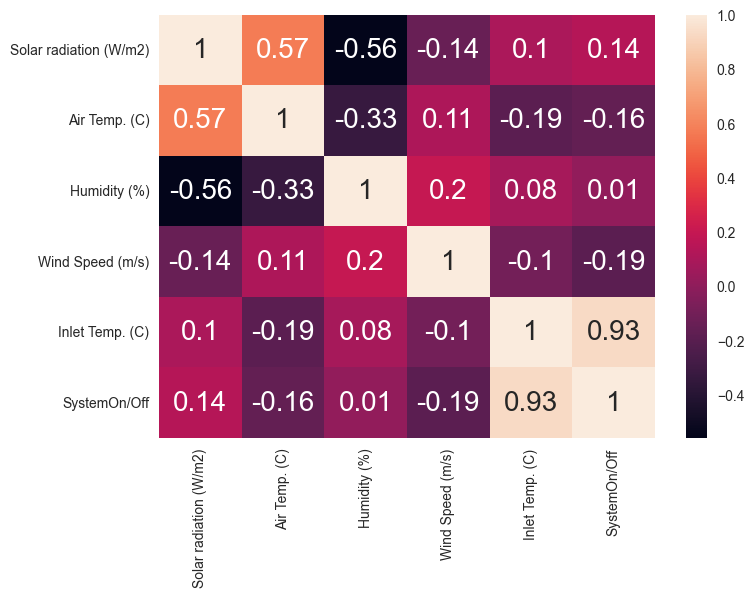

In [40]:
# dataset1 = dataset.drop(columns=['#','Av. Surface temp (non-heated zone) (C) '])
dataset1 = dataset.drop(columns=['#','Av. Surface temp (heated zone) (C) '])

# dataset1 = dataset1.rename(columns={'Av. Surface temp (non-heated zone) (C) ': 'Av. Surface temp (C)'})
rounded_corr_matrix = dataset1.corr().round(2)
heatmap = sns.heatmap(rounded_corr_matrix, annot=True, annot_kws={"fontsize": 20})
# heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 12}, pad=12)


# Adjust the DPI (dots per inch) for high quality
# plt.savefig('heatmap_high_quality.png', dpi=300, bbox_inches='tight')
plt.savefig(f'{directory}heatmap_with {regressor_name}.png', dpi=500, bbox_inches='tight', pad_inches=0.5)

# Show the plot (optional)
plt.show()






In [41]:
#Feature Scaling
sc_X = StandardScaler()
#sc_y = StandardScaler()
X = sc_X.fit_transform(X)
#y = sc_y.fit_transform(y)

In [42]:
xtrain, xtest, ytrain, ytest=train_test_split(X, y, test_size=0.25, random_state = 42)

In [43]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
#X, y = make_regression(n_samples=200, n_features=1, n_informative=5, random_state=1)

regressor.fit(xtrain, ytrain)

LinearRegression()

In [44]:
report_path = os.path.join(f'{directory}report_{regressor_name}.txt')
report_file = open(report_path, "w")

In [45]:
ypred = regressor.predict(xtest)

score = regressor.score(xtrain, ytrain)

scores = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# report performance
mean(absolute(scores)), std(scores)

MAE = mean_absolute_error(ytest, ypred)
mse = mean_squared_error(ytest, ypred)

report_file.write(f'MSE = {mse}, RMSE = {mse**(1/2.0)}, MAE = {MAE}, R-squared = {score}')
# print("MSE: ", mse)
# print("RMSE: ", mse**(1/2.0))
# print("MAE: ", MAE)
# print("R-squared:", score)

109

In [9]:
# X_unscaled = sc_X.inverse_transform(X)


In [10]:
# size = 30
# params = {'legend.fontsize': size,
#           'figure.figsize': (15, 5),
#          'axes.labelsize': size,
#          'axes.titlesize':size,
#          'xtick.labelsize':size,
#          'ytick.labelsize':size}
# pylab.rcParams.update(params)

# x_ax = range(len(ytest))
# plt.plot()
# plt.plot(x_ax, ytest, linewidth=5, color = "black", label="Actual values")
# plt.plot(x_ax, ypred, linewidth=5, color = "red", label=regressor_name+' prediction', linestyle='dashed', dashes=(5, 3))
# #plt.title("Measured and Predicted temperatures")
# plt.xlabel('Tests')
# plt.ylabel('Temperature (C)')
# plt.legend(loc='upper center',fancybox=True, shadow=True)
# plt.grid(True)

# fig = plt.gcf()
# fig.set_size_inches(30, 22)
# #fig.savefig('test2png.png', dpi=100)

# plt.savefig(f'Output/temperature_{regressor_name}.png')
# # files.download("temperature.png")

# plt.show() 

In [11]:
# skip_indices = []
# for i in range(201):
#     if (i % 3 != 0):
#         skip_indices.append(i)  # indices of points to skip

# masktest = np.ones(len(ytest), dtype=bool)  # create boolean mask with True for all points
# masktest[skip_indices] = False  # set the mask to False for the indices to skip

# maskpred = np.ones(len(ytest), dtype=bool)  # create boolean mask with True for all points
# maskpred[skip_indices] = False  # set the mask to False for the indices to skip

# xtest1 = np.arange(len(ytest))  # create x-coordinates for the points
# xpred1 = np.arange(len(ytest))  # create x-coordinates for the points

# # display(ytest[:,0])
# plt.plot(np.array(xtest1)[masktest], np.array(ytest)[masktest], color='blue', label='Actual Values', marker='o', linewidth=4, markersize=8)
# plt.plot(np.array(xpred1)[maskpred], np.array(ypred)[maskpred], color='red', label='Predicted Values', marker='s', linestyle='--', linewidth=4, markersize=8)
# plt.tick_params(axis='both', which='major', labelsize=16)  # Adjust the labelsize parameter to increase the font size of the axis numbers

# plt.title(regressor_name,fontsize=16)
# plt.ylabel(Vaxis,fontsize=16)
# plt.xlabel('Test index', fontsize=16)
# plt.legend(loc='upper left', fontsize='large', bbox_to_anchor=(1.05, 1.0))  # Adjust the fontsize parameter to increase the legend size

# fig = plt.gcf()
# # fig.set_size_inches(12, 12)
# # fig.set_size_inches(30, 22)

# plt.subplots_adjust(left=0.5, right=2, top=0.95, bottom=0.5)

# # fig.savefig(f'Output/Line with {regressor_name}.png', dpi=100, bbox_inches='tight', pad_inches=0.5)
# # fig.savefig(f'Output/Line with {regressor_name}.png')
# plt.savefig(f'{directory}Line with {regressor_name}.png', dpi=500, bbox_inches='tight', pad_inches=0.5)

# plt.show()

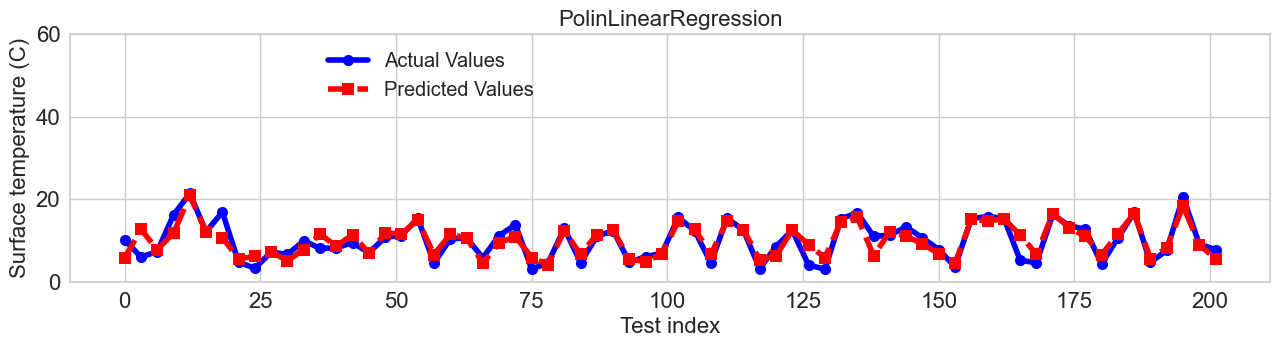

In [46]:
skip_indices = []
for i in range(201):
    if (i % 3 != 0):
        skip_indices.append(i)  # indices of points to skip

masktest = np.ones(len(ytest), dtype=bool)  # create a boolean mask with True for all points
masktest[skip_indices] = False  # set the mask to False for the indices to skip

maskpred = np.ones(len(ytest), dtype=bool)  # create a boolean mask with True for all points
maskpred[skip_indices] = False  # set the mask to False for the indices to skip

xtest1 = np.arange(len(ytest))  # create x-coordinates for the points
xpred1 = np.arange(len(ytest))  # create x-coordinates for the points

plt.plot(np.array(xtest1)[masktest], np.array(ytest)[masktest], color='blue', label='Actual Values', marker='o', linewidth=4, markersize=8)
plt.plot(np.array(xpred1)[maskpred], np.array(ypred)[maskpred], color='red', label='Predicted Values', marker='s', linestyle='--', linewidth=4, markersize=8)
plt.tick_params(axis='both', which='major', labelsize=16)  # Adjust the labelsize parameter to increase the font size of the axis numbers

plt.title(regressor_name, fontsize=16)
plt.ylabel(Vaxis, fontsize=16)
plt.xlabel('Test index', fontsize=16)

# Adjust the legend's position within the plot
# plt.legend(loc='upper left', fontsize='large', bbox_to_anchor=(0.2, 1.0))
plt.legend(loc='upper left', fontsize='large', bbox_to_anchor=(0.2, 1.0))

plt.ylim(0, 60)

fig = plt.gcf()
# fig.set_size_inches(12, 12)
# fig.set_size_inches(30, 22)

plt.subplots_adjust(left=0.5, right=2, top=0.95, bottom=0.5)

# Save the figure
plt.savefig(f'{directory}Line with {regressor_name}.png', dpi=500, bbox_inches='tight', pad_inches=0.5)

plt.show()


In [13]:
# skip_indices = []
# for i in range(201):
#     if (i%5!=0):
#         skip_indices.append(i)  # indices of points to skip

# masktest = np.ones(len(ytest), dtype=bool)  # create boolean mask with True for all points
# masktest[skip_indices] = False  # set the mask to False for the indices to skip

# maskpred = np.ones(len(ytest), dtype=bool)  # create boolean mask with True for all points
# maskpred[skip_indices] = False  # set the mask to False for the indices to skip

# xtest1 = np.arange(len(ytest))  # create x-coordinates for the scatter points
# xpred1 = np.arange(len(ytest))  # create x-coordinates for the scatter points

# plt.scatter(np.array(xtest1)[masktest], np.array(ytest)[masktest], color='blue', label='Actual Values')
# plt.scatter(np.array(xpred1)[maskpred], np.array(ypred)[maskpred], color='red', label='Predicted Values')
# plt.title(regressor_name)
# plt.ylabel('Temperature (C)')
# plt.xlabel('Test index')
# plt.legend()

# fig = plt.gcf()
# fig.set_size_inches(10, 10)
# # fig.set_size_inches(30, 22)

# plt.subplots_adjust(left=0.5, right=2, top=0.95, bottom=0.5)

# fig.savefig(f'Output/Scatter with {regressor_name}.png',dpi=100,bbox_inches = 'tight', pad_inches=0.5)

# plt.show()

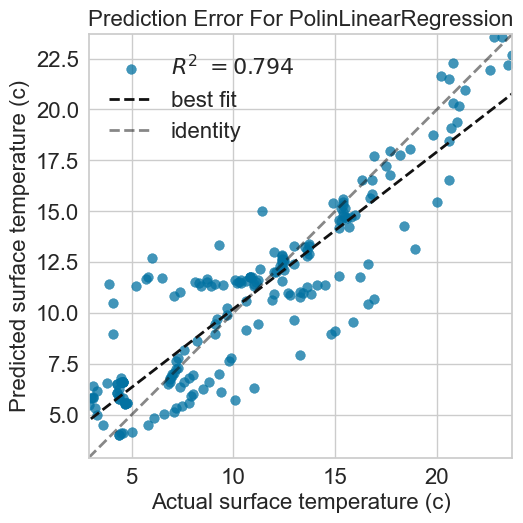

In [47]:
#https://www.scikit-yb.org/en/latest/matplotlib.
#https://www.scikit-yb.org/en/latest/faq.html


#regressor = XGBRegressor()
# regressor = RandomForestRegressor()
#regressor = LinearRegression()
#regressor = SVR(kernel = 'linear')
#regressor = KNeighborsRegressor(n_neighbors=3)
# Fit the visualizer
model = PredictionError(regressor)
model.fit(xtrain, ytrain)
model.score(xtest, ytest)



# Call finalize to draw the final yellowbrick-specific elements
model.finalize()

# Get access to the axes object and modify labels
size = 16

model.ax.set_xlabel(f"Actual {Vaxis.lower()}",fontsize=size)
model.ax.set_ylabel(f"Predicted {Vaxis.lower()}",fontsize=size)
model.ax.legend(fontsize=size)
model.ax.tick_params(axis="x", labelsize=size)
model.ax.tick_params(axis="y", labelsize=size)
plt.title(f'Prediction Error For {regressor_name}', fontsize=size)
# plt.savefig(f'Output/PredictionError with {regressor_name}.png')
plt.savefig(f'{directory}PredictionError with {regressor_name}.png', dpi=500, bbox_inches='tight', pad_inches=0.5)

# files.download("RandomForestRegressor.png")

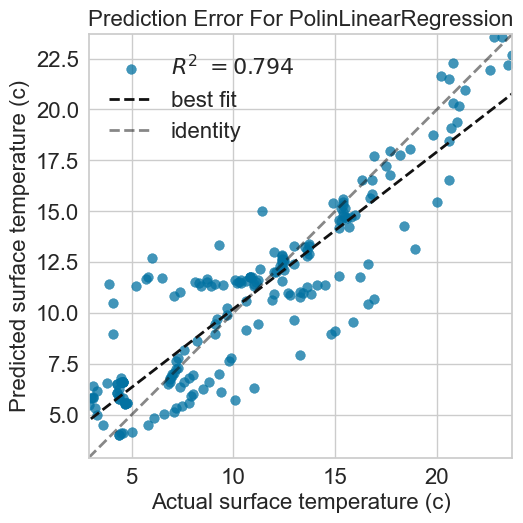

In [48]:
#https://www.scikit-yb.org/en/latest/matplotlib.
#https://www.scikit-yb.org/en/latest/faq.html


#regressor = XGBRegressor()
# regressor = RandomForestRegressor()
#regressor = LinearRegression()
#regressor = SVR(kernel = 'linear')
#regressor = KNeighborsRegressor(n_neighbors=3)
# Fit the visualizer
model = PredictionError(regressor)
model.fit(xtrain, ytrain)
model.score(xtest, ytest)



# Call finalize to draw the final yellowbrick-specific elements
model.finalize()

# Get access to the axes object and modify labels
size = 16

model.ax.set_xlabel(f"Actual {Vaxis.lower()}",fontsize=size)
model.ax.set_ylabel(f"Predicted {Vaxis.lower()}",fontsize=size)
model.ax.legend(fontsize=size)
model.ax.tick_params(axis="x", labelsize=size)
model.ax.tick_params(axis="y", labelsize=size)
plt.title(f'Prediction Error For {regressor_name}', fontsize=size)
# plt.savefig(f'Output/PredictionError with {regressor_name}.png')
plt.savefig(f'{directory}PredictionError with {regressor_name}.png', dpi=500, bbox_inches='tight', pad_inches=0.5)

# files.download("RandomForestRegressor.png")

In [16]:
# from yellowbrick.regressor import ResidualsPlot
# import matplotlib.pyplot as plt

# # Instantiate the linear model and visualizer
# visualizer = ResidualsPlot(regressor)

# visualizer.fit(xtrain, ytrain)  # Fit the training data to the visualizer
# visualizer.score(xtest, ytest)  # Evaluate the model on the test data

# size = 16

# visualizer.ax.set_xlabel(f"Actual {Vaxis.lower()}", fontsize=size)
# visualizer.ax.set_ylabel(f"Predicted {Vaxis.lower()}", fontsize=size)
# visualizer.ax.tick_params(axis="x", labelsize=size)
# visualizer.ax.tick_params(axis="y", labelsize=size)

# # Add a legend
# visualizer.ax.legend(["Actual vs. Predicted"])

# # Save the figure
# plt.savefig(f'{directory}Residuals with {regressor_name}.png', dpi=500, bbox_inches='tight')

# visualizer.show()


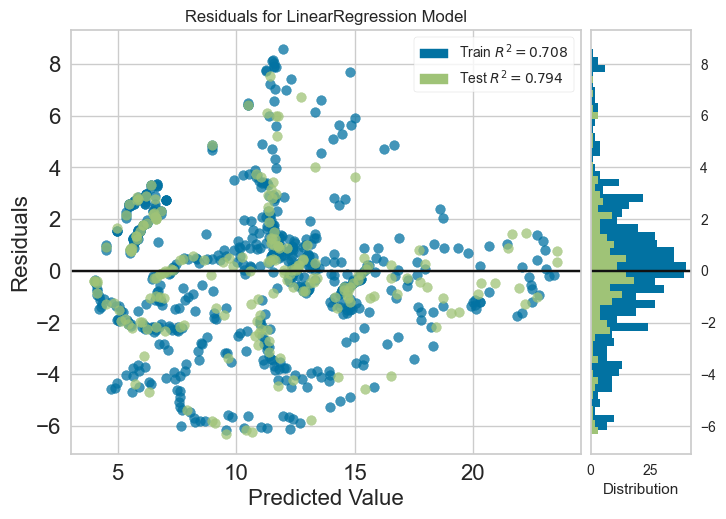

In [49]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
visualizer = ResidualsPlot(regressor)

visualizer.fit(xtrain, ytrain)  # Fit the training data to the visualizer
visualizer.score(xtest, ytest)  # Evaluate the model on the test data

size = 16

visualizer.ax.set_xlabel(f"Actual {Vaxis.lower()}", fontsize=size)
visualizer.ax.set_ylabel(f"Predicted {Vaxis.lower()}", fontsize=size)
visualizer.ax.legend(fontsize=size)
visualizer.ax.tick_params(axis="x", labelsize=size)
visualizer.ax.tick_params(axis="y", labelsize=size)

# Save the figure
plt.savefig(f'{directory}Residuals with {regressor_name}.png', dpi=500, bbox_inches='tight')

visualizer.show()

report_file.close()



In [18]:
# Feature importance
# size = 20
# params = {'legend.fontsize': size,
#           'figure.figsize': (10, 10),
#          'axes.labelsize': size,
#          'axes.titlesize':size,
#          'xtick.labelsize':size,
#          'ytick.labelsize':size}
# pylab.rcParams.update(params)


# importance = regressor.feature_importances_
# # features = ['DNI (W/m2)','Air Temp. (C)','Humidity (%)','Wind Speed (m/s)','Inlet Temp. (C)','SystemOn/Off']

# features = ['Solar radiation (W/m2)','Air Temp. (C)','Humidity (%)','Wind Speed (m/s)']

# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# #pyplot.bar([x for x in range(len(importance))], importance)
# sns.barplot(y=features, x=importance)
# plt.xlabel(f'Features Importance Score with {regressor_name}')
# #plt.ylabel('Feature')
# #plt.title("Visualising Important Features (Heated zone)")

# fig = plt.gcf()
# fig.set_size_inches(10, 10)
# # fig.set_size_inches(30, 22)

# plt.subplots_adjust(left=0.5, right=2, top=0.95, bottom=0.5)

# fig.savefig(f'Output/Feature importance with {regressor_name}.png',dpi=100,bbox_inches = 'tight', pad_inches=0.5)

# #plt.savefig(f'Output/feature importance with {regressor_name}.png', dpi=500)

# #fig.savefig('test2png.png', dpi=100)

# # files.download("featureImportance.png")
# pyplot.show()

In [19]:
# import tensorflow as tf

# from tensorflow import keras
# # from tensorflow.keras import layers

# print(tf.__version__)

In [20]:
# # dataset_full = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Temperature_Texas/Temperature_Data.csv")
# dataset_full = pd.read_csv('Temperature_Data.csv')

# dataset = dataset_full.iloc[:, 2:]
# train_dataset = dataset.sample(frac=0.8, random_state=0)
# test_dataset = dataset.drop(train_dataset.index)

In [21]:
# train_dataset.describe().transpose()[['mean', 'std']]